# EDA-Project 3

Это ваш третий проект из второго блока курса Data Science. 
Вам предоставляется следующий файл: ```"netflix_titles.csv"```.

Сделайте EDA по данным. 
Перечислите вопросы, которые вы считаете важными. Затем попробуйте ответить на каждый вопрос, с визуализации. Пожалуйста, сделайте ваш код чистым, а аргументы понятными.


In [1]:
import pandas as pd
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",context="talk")

# Подготовка данных

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
data.shape

(6234, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
columns_nan = data.columns[data.isnull().sum() > 0]
for column in columns_nan:
    if column == "director":
        data[column] = data[column].replace({np.nan:"Unknown"})
    data[column] = data[column].replace({np.nan:data[column].mode()[0]})

In [8]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
pd_data = data.copy()
pd_data["date_added"] = pd.to_datetime(pd_data['date_added'])
pd_data['month_added']=pd_data['date_added'].dt.month
pd_data['month_name_added']=pd_data['date_added'].dt.month_name()
pd_data['year_added'] = pd_data['date_added'].dt.year
pd_data["weekday_added"] = pd_data["date_added"].dt.day_name()
pd_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,weekday_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,September,2019,Monday
1,80117401,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,September,2016,Friday
2,70234439,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9,September,2018,Saturday
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9,September,2018,Saturday
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9,September,2017,Friday


# Визуализация данных

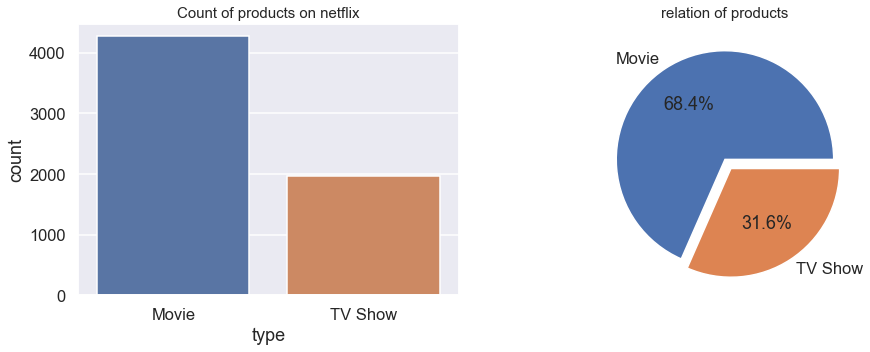

In [10]:
sns.set(style="darkgrid", context="talk")

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x="type", data=pd_data, ax=axs[0])
axs[0].set_title("Count of products on netflix", fontsize=(15));
axs[1].pie(x=pd_data["type"].value_counts().values, labels=pd_data["type"].value_counts().index, autopct=lambda x: f"{x:.1f}%",  explode=[0,0.1])
axs[1].set_title("relation of products", fontsize=15);

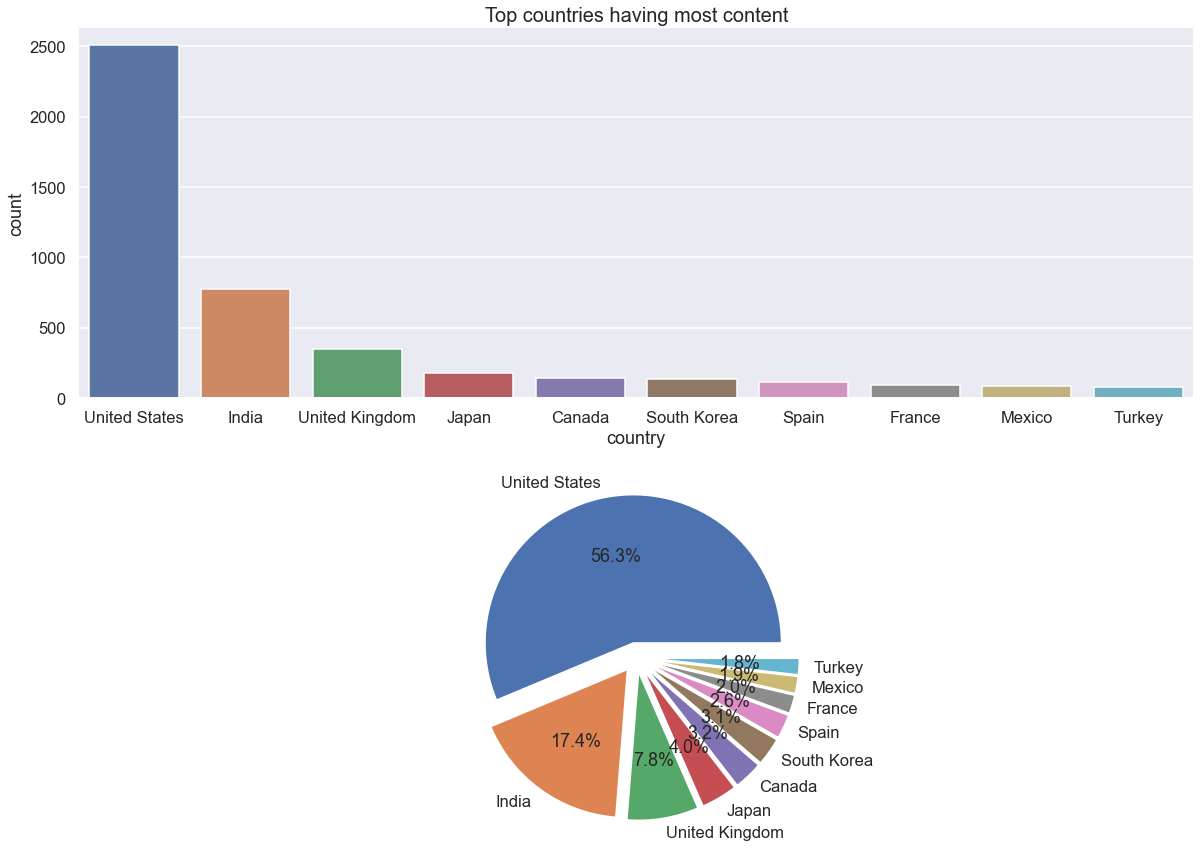

In [11]:
fig, axs = plt.subplots(2,1, figsize=(20,15))
sns.countplot(x="country", data=pd_data, order=pd_data["country"].value_counts().index[:10], ax=axs[0]);
axs[0].set_title("Top countries having most content", fontsize=20);
axs[1].pie(x=pd_data["country"].value_counts().values[:10], labels=pd_data["country"].value_counts().index[:10], autopct=lambda x: f"{x:.1f}%",  explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]);

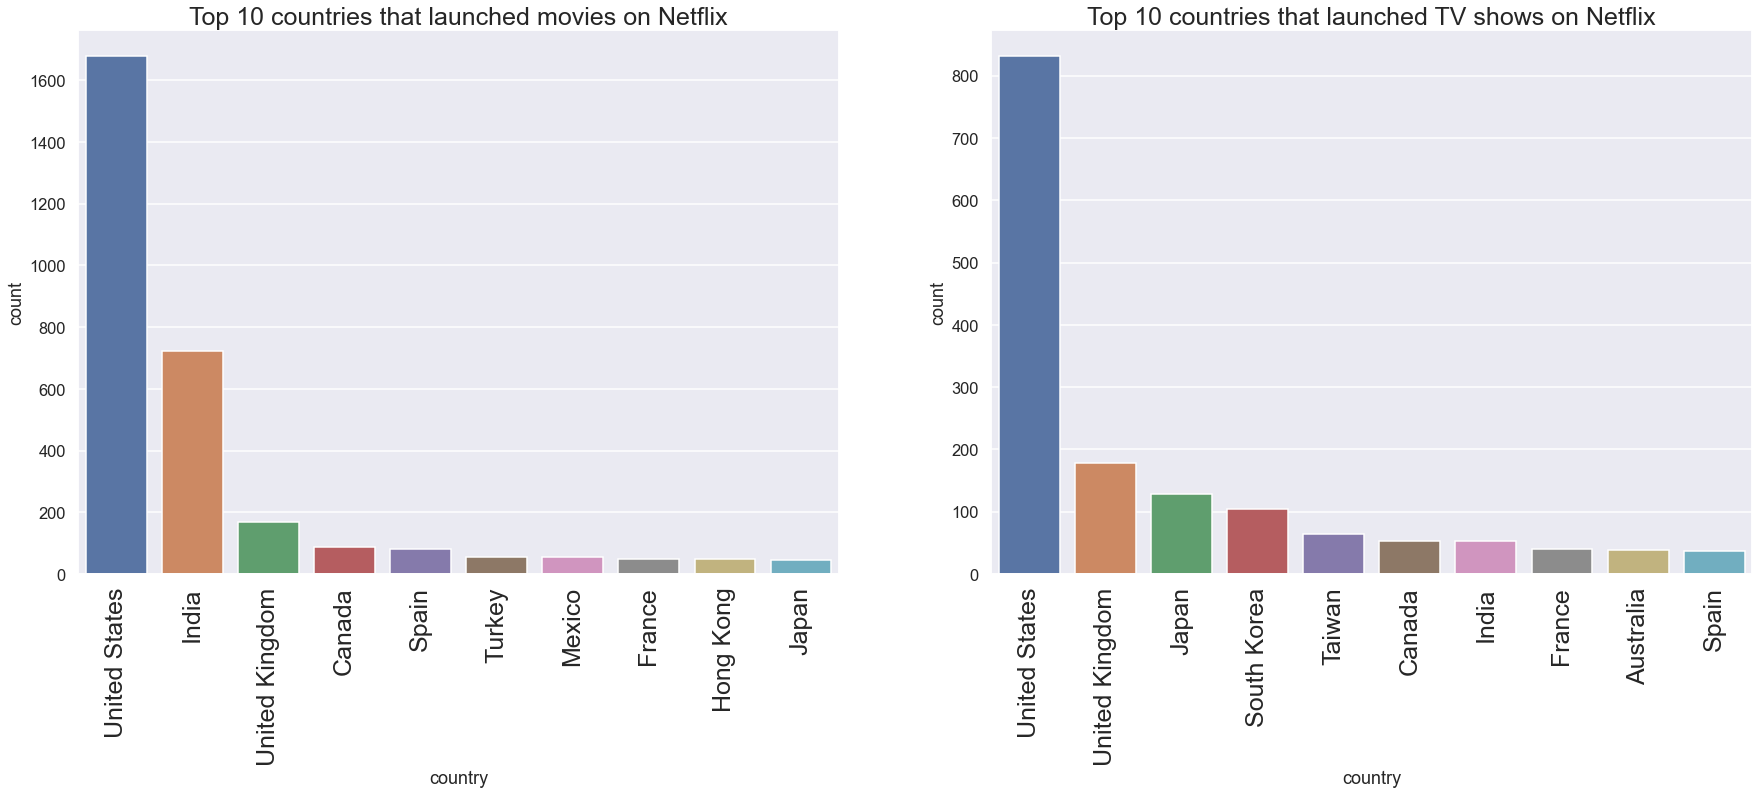

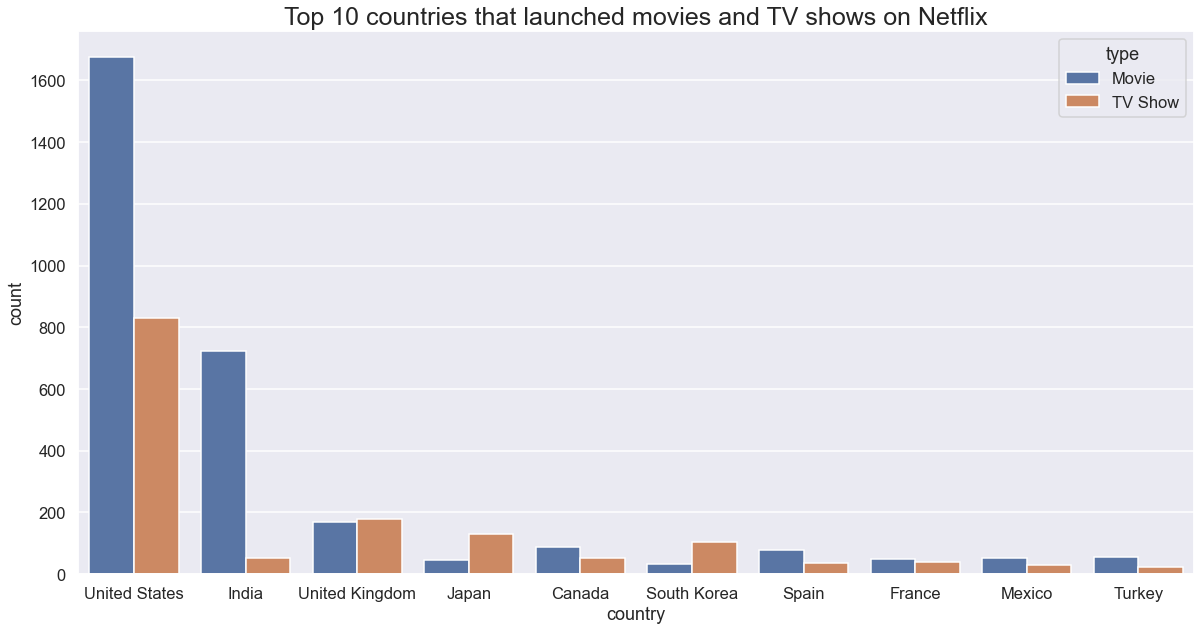

In [12]:
order_movie = pd_data[pd_data["type"]=="Movie"]["country"].value_counts().index[:10]
order_tv_show = pd_data[pd_data["type"]=="TV Show"]["country"].value_counts().index[:10]

fig, axs = plt.subplots(1,2,figsize=(30,10))
sns.countplot(x="country", data=pd_data[pd_data["type"]=="Movie"], order=order_movie, ax=axs[0])
axs[0].set_title("Top 10 countries that launched movies on Netflix", fontsize=25)
axs[0].set_xticklabels(order_movie,rotation=90, fontsize=25)

sns.countplot(x="country", data=pd_data[pd_data["type"]=="TV Show"], order=order_tv_show, ax=axs[1])
axs[1].set_title("Top 10 countries that launched TV shows on Netflix", fontsize=25);
axs[1].set_xticklabels(order_tv_show,rotation=90, fontsize=25)

plt.figure(figsize=(20,10))
sns.countplot(x="country", data=pd_data, hue="type", order=pd_data["country"].value_counts().index[:10])
plt.title("Top 10 countries that launched movies and TV shows on Netflix", fontsize=25);

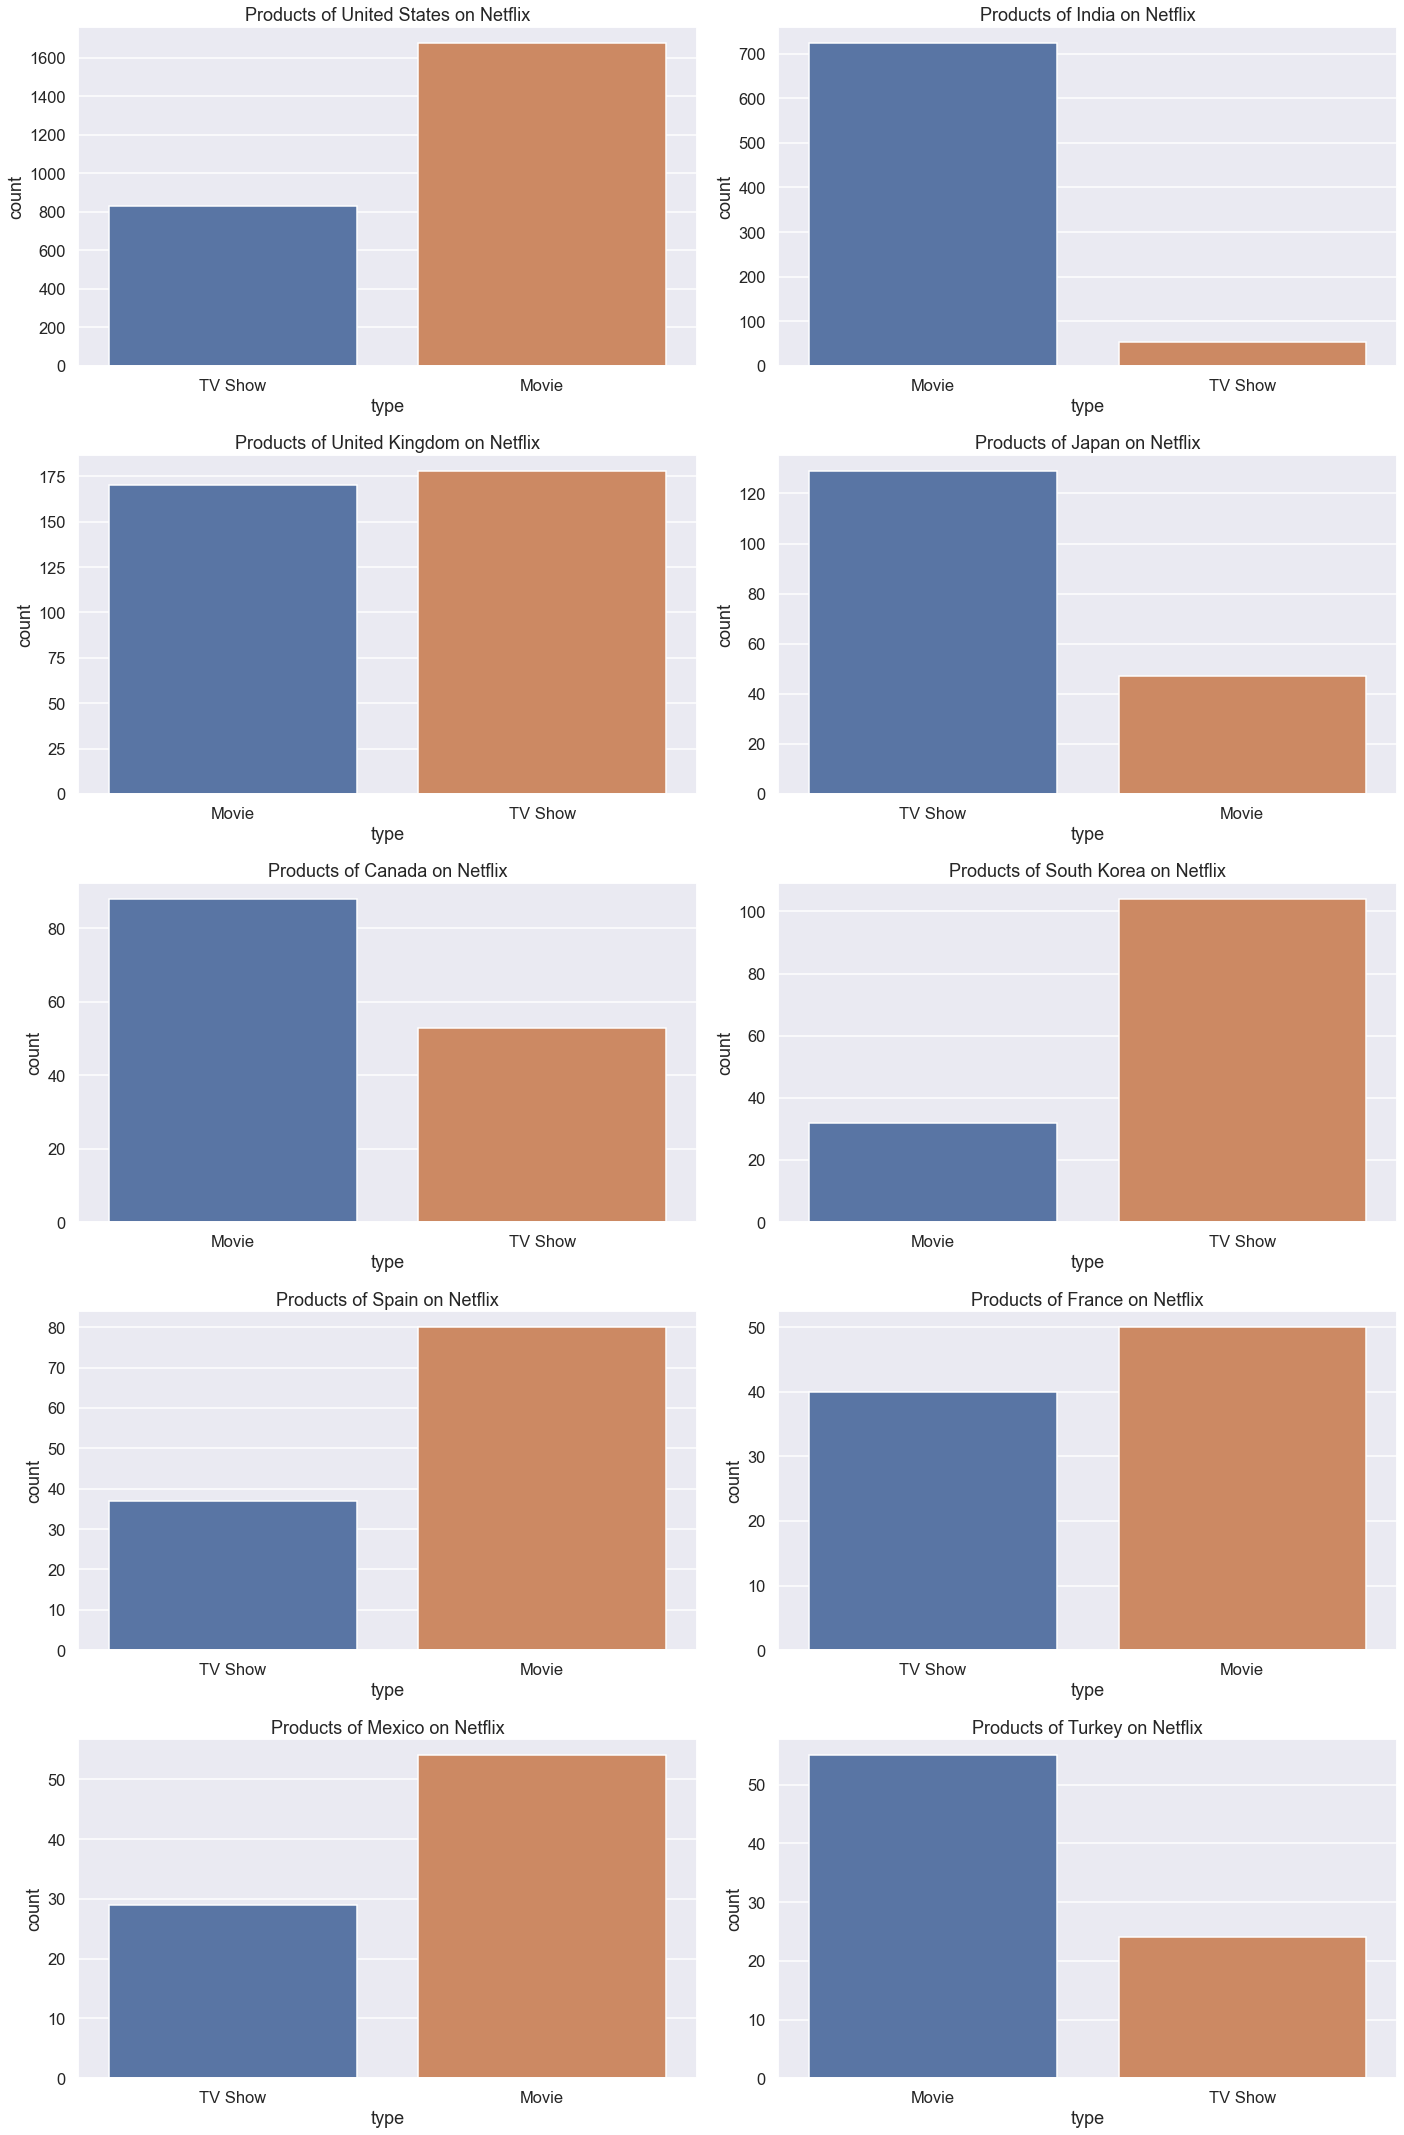

In [13]:
sns.set(style="darkgrid", context="talk")
columns = pd_data["country"].value_counts().index[:10]
index=0
fig, axs = plt.subplots(5,2, figsize=(20,30))
for row in range(5):
    for col in range(2):
        plt.tight_layout()
        sns.countplot(x = "type",data=pd_data[pd_data["country"] == columns[index]], 
                      ax=axs[row][col]).set(title=f"Products of {columns[index]} on Netflix")
        index = index + 1

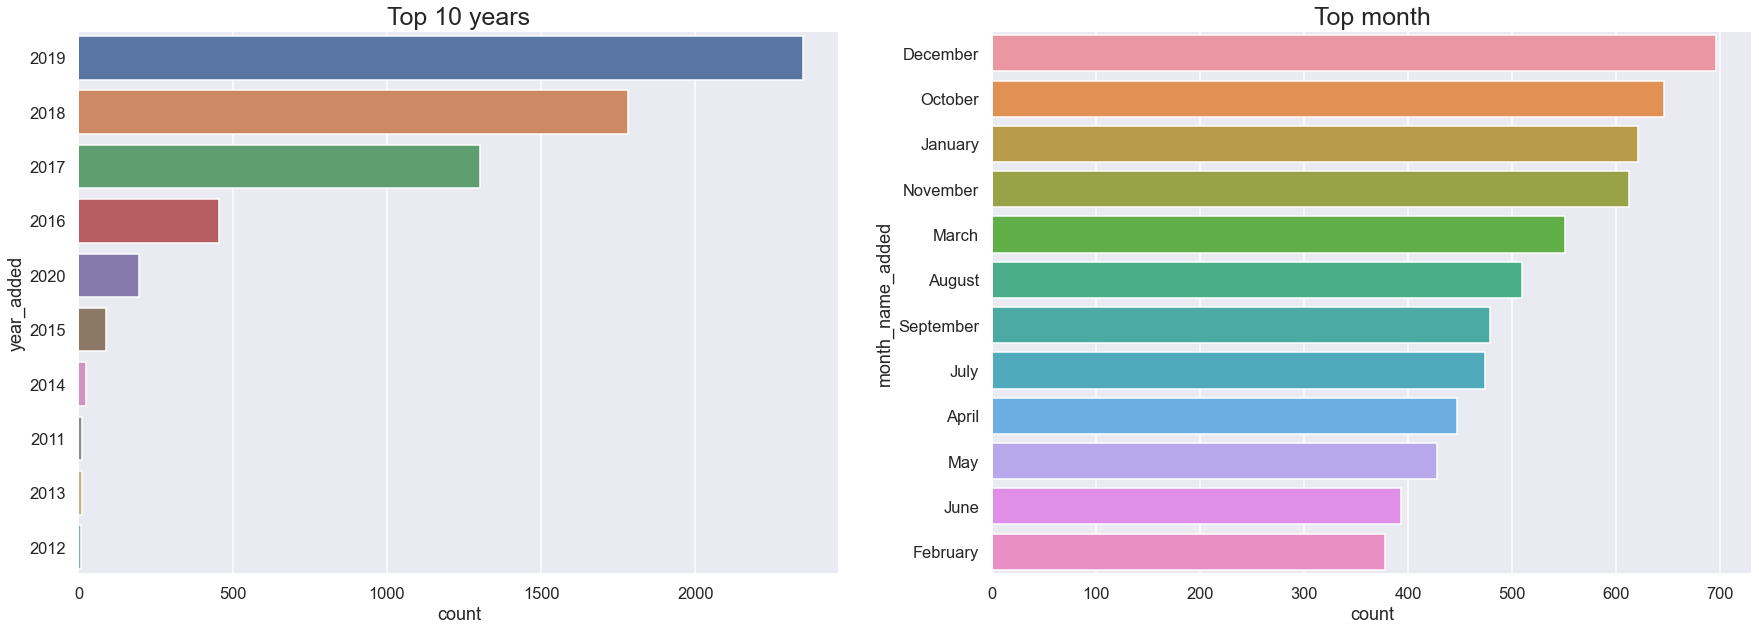

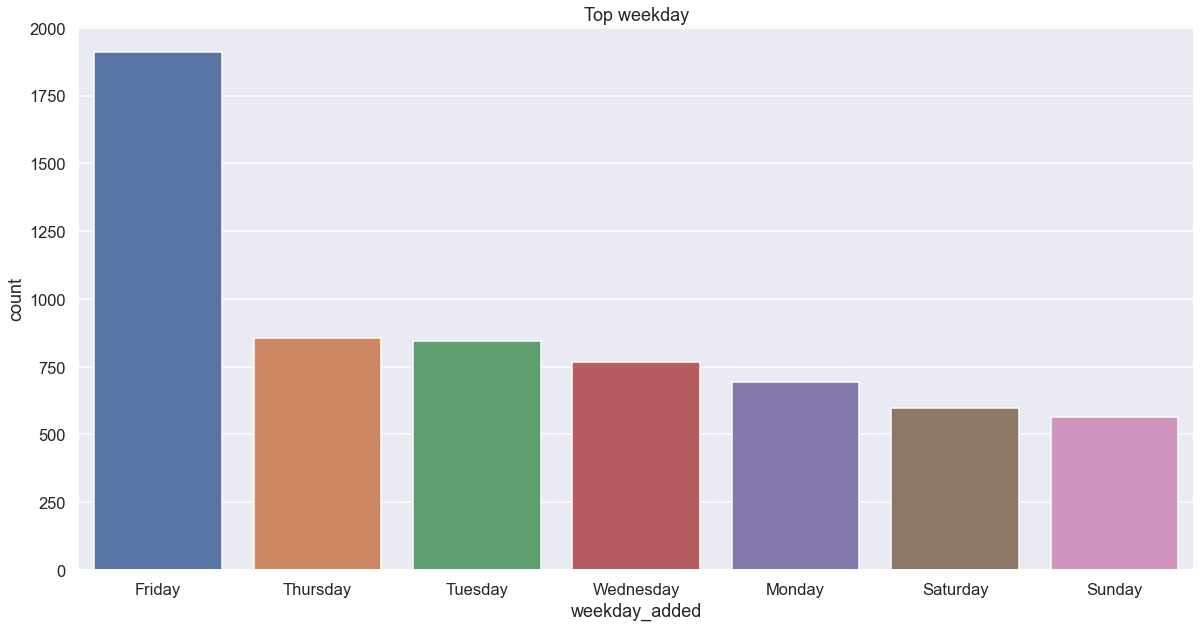

In [14]:
fig, axs = plt.subplots(1,2, figsize=(30,10))
sns.countplot(y="year_added", data=pd_data, order=pd_data["year_added"].value_counts().index[:10], ax=axs[0])
axs[0].set_title("Top 10 years", fontsize=25);

sns.countplot(y="month_name_added", data=pd_data, order=pd_data["month_name_added"].value_counts().index[:12], ax=axs[1])
axs[1].set_title("Top month", fontsize=25);

plt.figure(figsize=(20,10))
sns.countplot(x="weekday_added", data=pd_data,  order=pd_data["weekday_added"].value_counts().index[:7]);
plt.title("Top weekday");

Этот график показывает добавление продуктов на платформу Netflix в годах, в месяцах и в днях

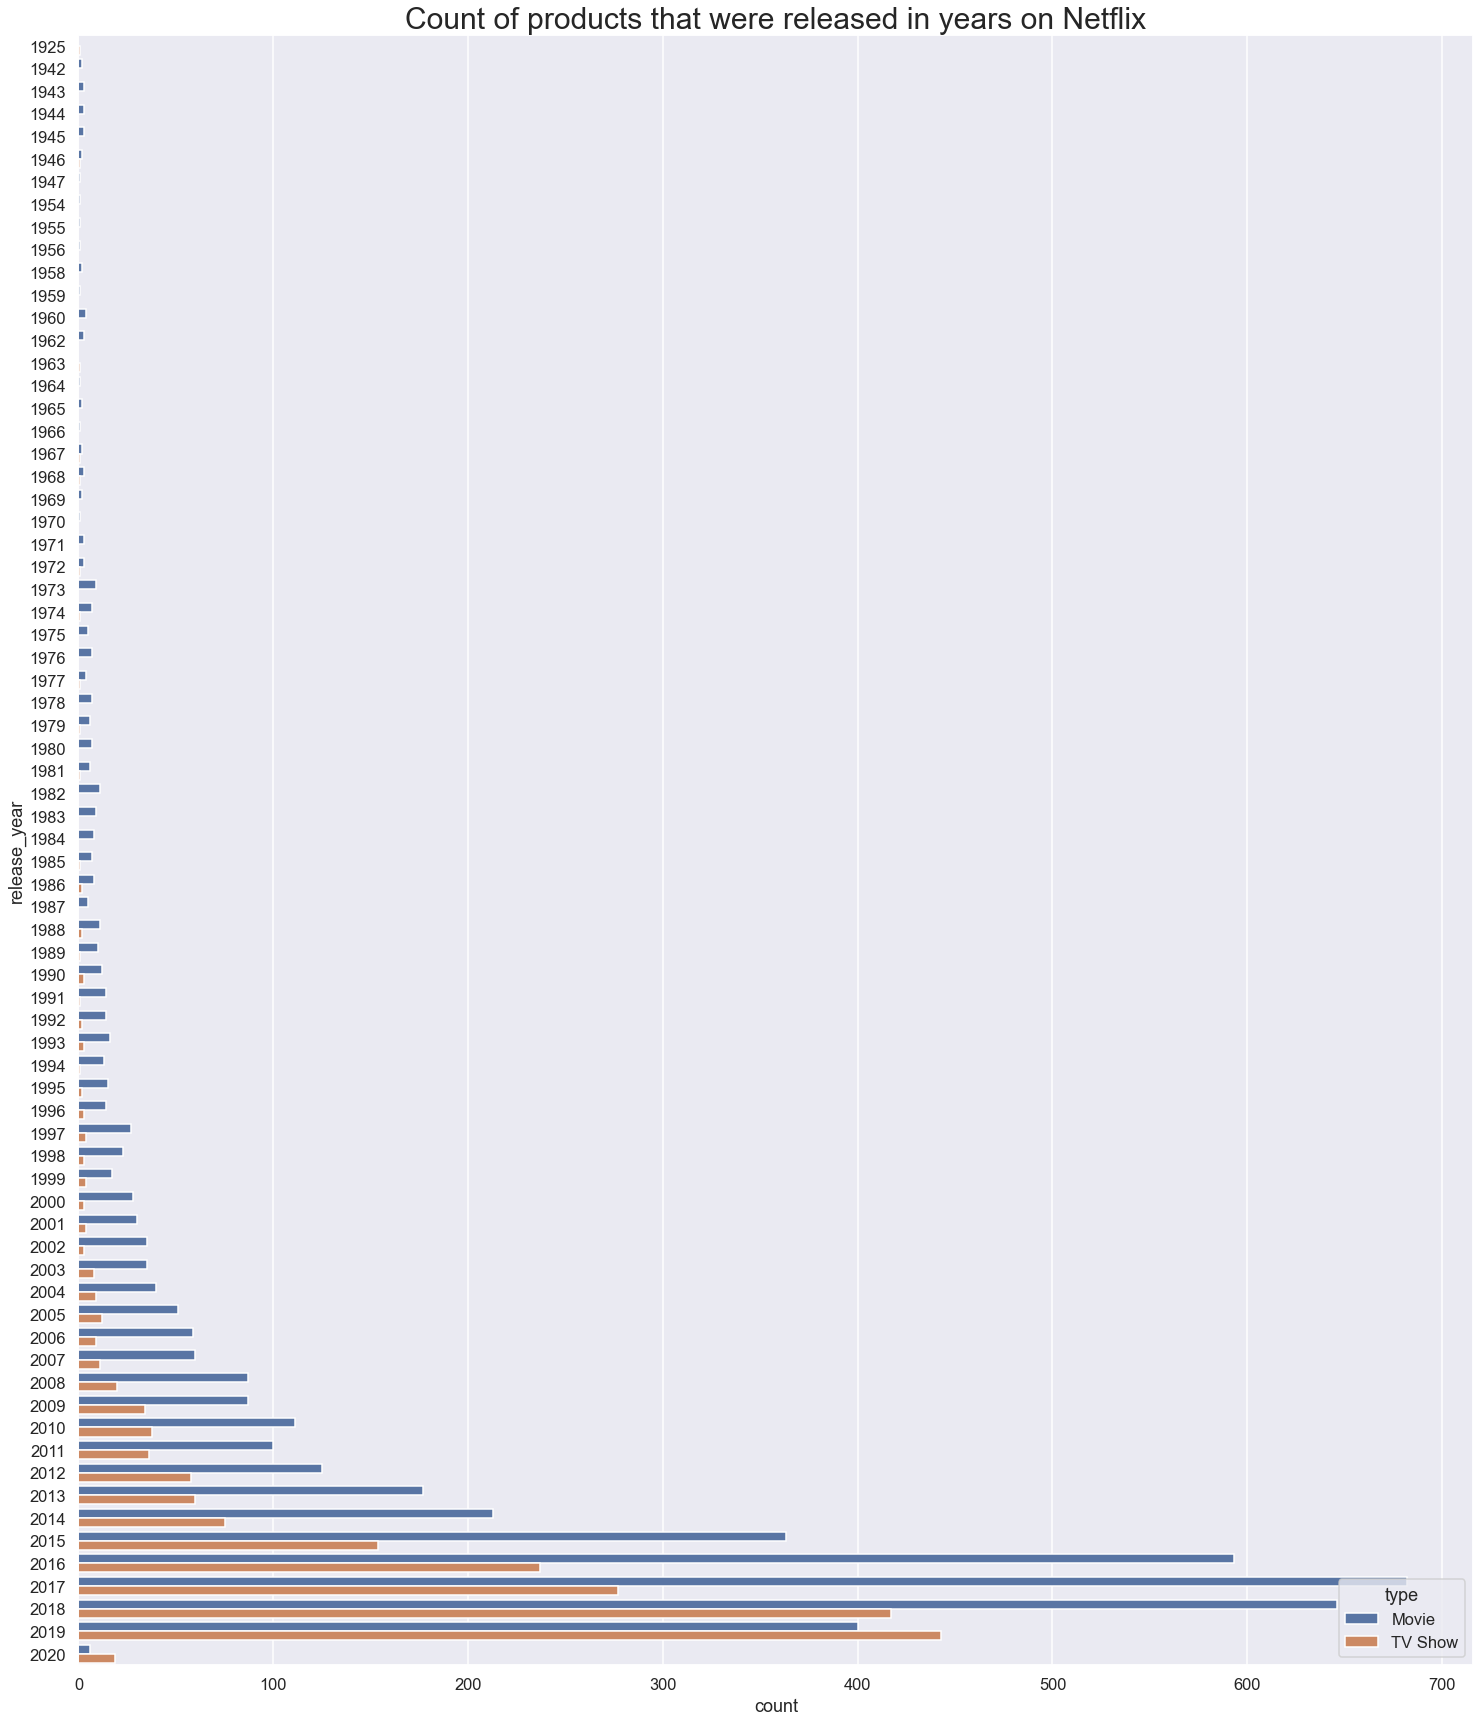

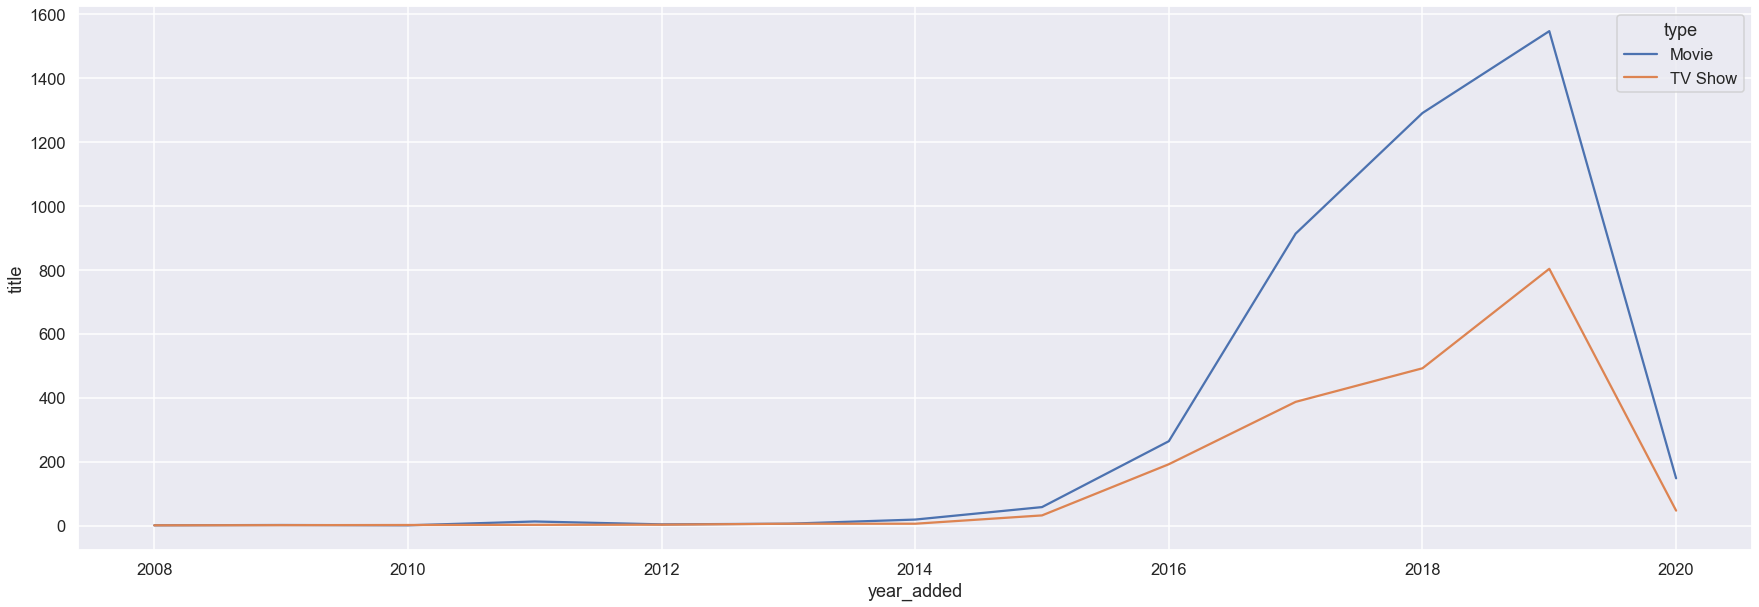

In [15]:
plt.figure(figsize=(25,30))
sns.countplot(y="release_year", data=pd_data, hue="type");
plt.title("Сount of products that were released in years on Netflix", fontsize=30);

type_year = (pd_data.groupby(['type','year_added'])['title'].count()).reset_index()
plt.figure(figsize=(30,10))
sns.lineplot(x="year_added", y="title", data=type_year, hue="type");

По графику видно что на платформе Netflix растёт количество продуктов с 2015 года. Причиной этому было увеличение количество контрактов, которые Netflix заключил с 130 странами
Но с 2020 года идет уменьшение продуктов на платформе. Причина этому- мировая пандемия

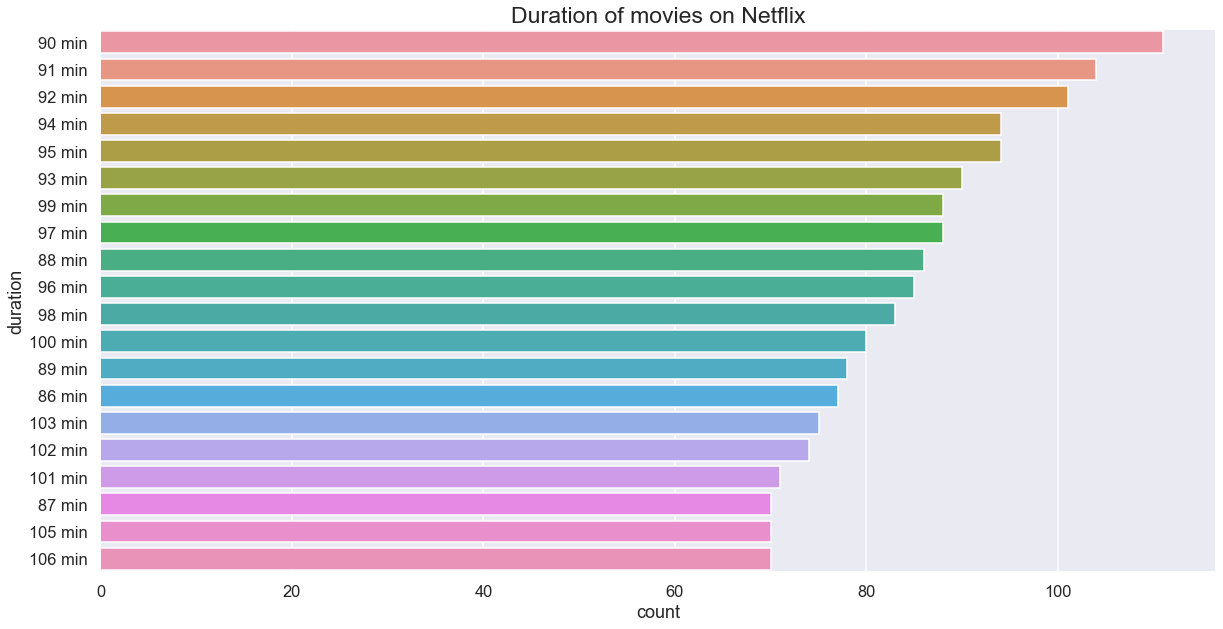

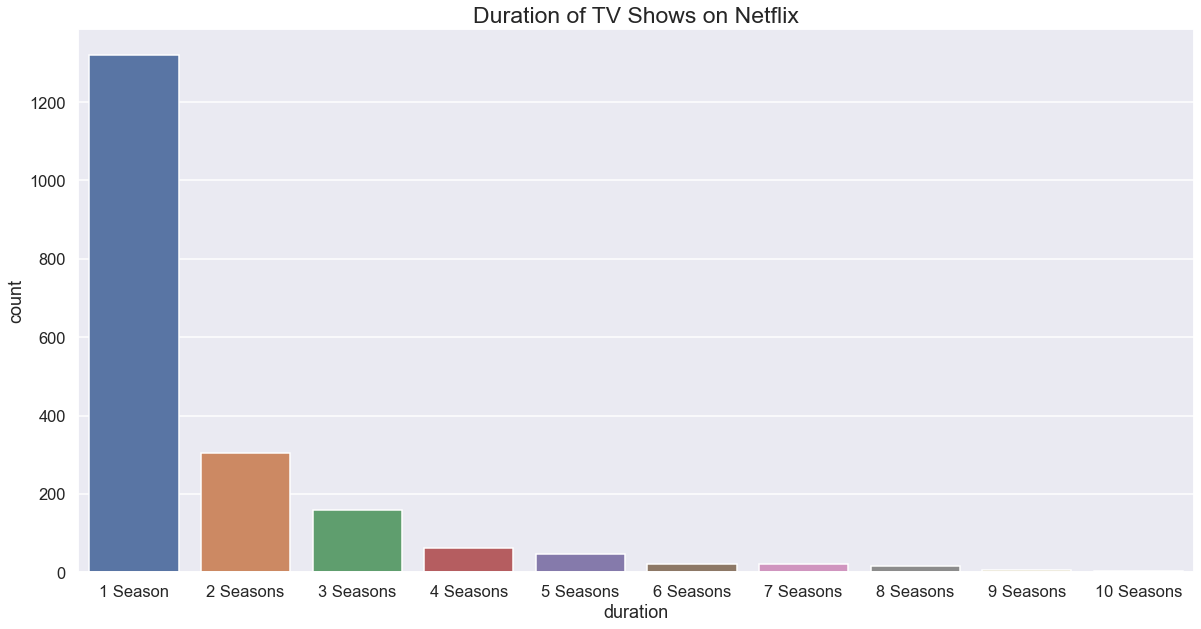

In [16]:
top20_movie_duration=pd_data[pd_data["type"] == "Movie"]["duration"].value_counts().head(20).rename_axis("duration").reset_index(name="count")
top20_tv_show_duration=pd_data[pd_data["type"] == "TV Show"]["duration"].value_counts().head(10).rename_axis("duration").reset_index(name="count")

plt.figure(figsize=(20,10))
sns.barplot(x="count", y="duration", data=top20_movie_duration)
plt.title("Duration of movies on Netflix", fontsize=23)

plt.figure(figsize=(20,10))
sns.barplot(x="duration", y="count", data=top20_tv_show_duration);
plt.title("Duration of TV Shows on Netflix", fontsize=23);

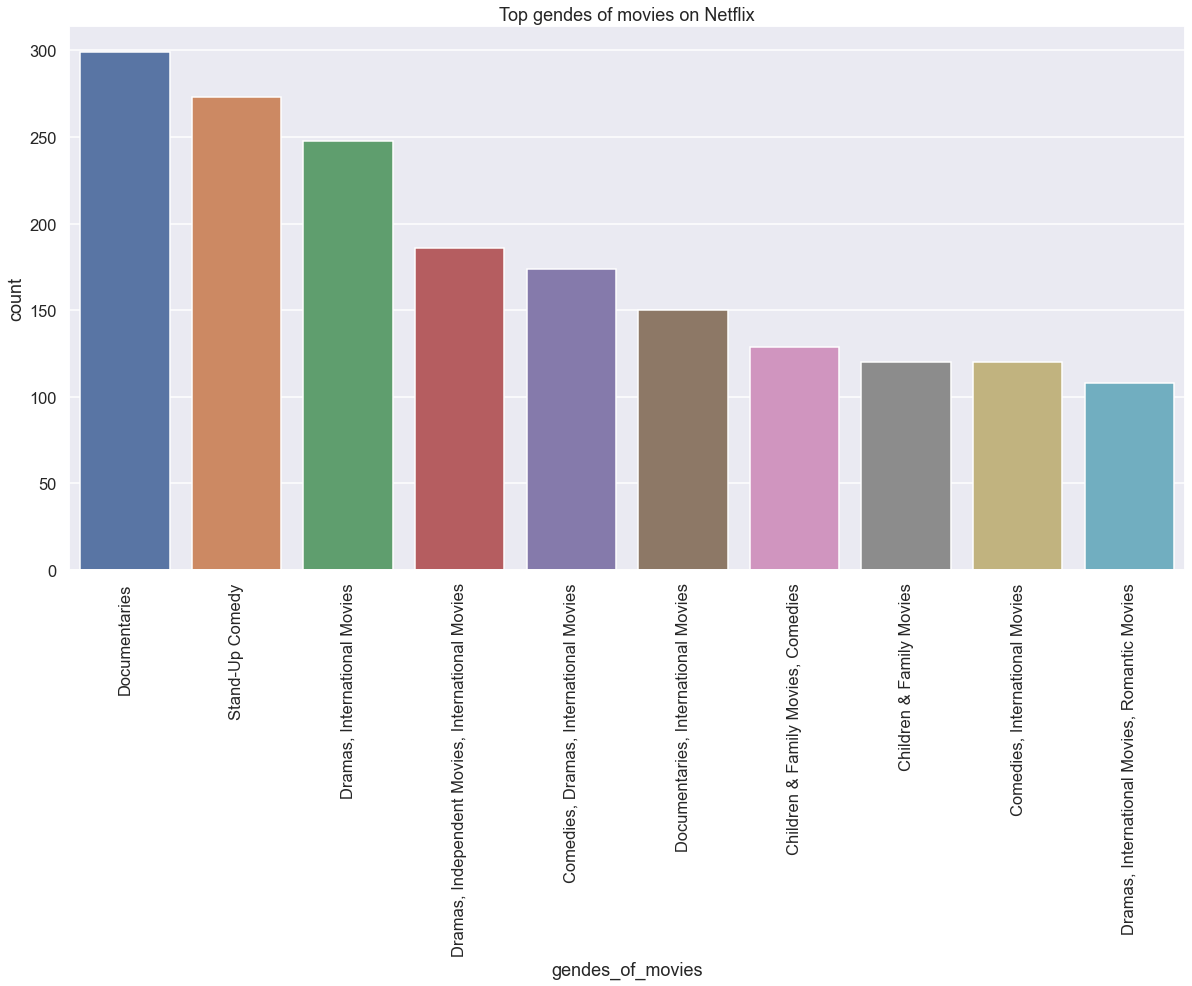

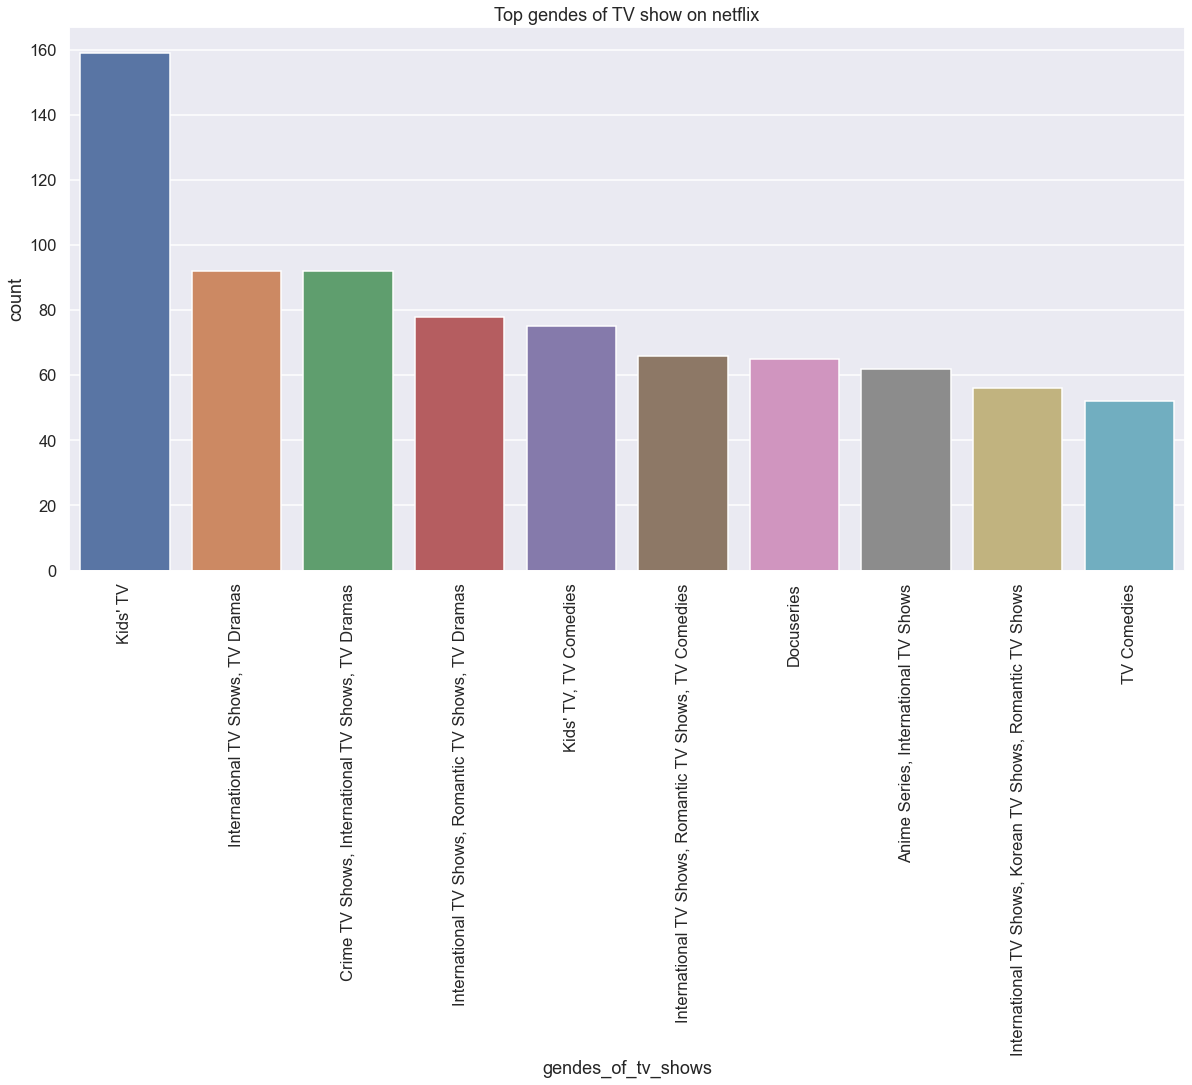

In [17]:
top_20_gendes_movie = pd_data.loc[pd_data["type"]=="Movie"]["listed_in"].value_counts().rename_axis("gendes_of_movies").reset_index(name="count").head(10)
top_20_gendes_tv_show = pd_data.loc[pd_data["type"]=="TV Show"]["listed_in"].value_counts().rename_axis("gendes_of_tv_shows").reset_index(name="count").head(10)

plt.figure(figsize=(20,10))
sns.barplot(x="gendes_of_movies", y="count", data=top_20_gendes_movie)
plt.xticks(rotation=90)
plt.title("Top gendes of movies on Netflix");

plt.figure(figsize=(20,10))
sns.barplot(x="gendes_of_tv_shows", y="count", data=top_20_gendes_tv_show)
plt.xticks(rotation=90)
plt.title("Top gendes of TV show on netflix");